In [1]:
from matplotlib import pyplot
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import time
import re
from ipaddress import ip_address
from urllib.parse import urlparse
import json
import isodate
from dateutil import parser
from dateutil import tz
from pyspark.sql.types import StructField, StructType, StringType
from pyspark.sql import Row
from pyspark.sql import functions as pyspark_function
from urllib.request import urlopen
import subprocess
import os.path
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import mktime
import time
from datetime import date, timedelta, datetime, tzinfo
import time

In [2]:
import pyspark
import random
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import pyspark.sql.functions as pyf
import numpy as np
import pandas 
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext


        
spark = SparkSession \
        .builder \
        .appName("Test Spark") \
        .config("spark.jars", "/opt/postgresql-42.4.0.jar") \
        .config("spark.num.executors"," 16")  \
        .config("spark.executor.cores", "8") \
        .config("spark.executor.memory", "20g") \
        .config("spark.scheduler.mode", "FAIR") \
        .config("spark.sql.autoBroadcastJoinThreshold", -1) \
        .master("spark://131.225.58.251:7077") \
        .getOrCreate() \



#spark.conf.set("spark.executor.memory", "20g")
#spark.conf.set("spark.executor.cores", "8")

22/07/20 15:29:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/07/20 15:29:55 WARN FairSchedulableBuilder: Fair Scheduler configuration file not found so jobs will be scheduled in FIFO order. To use fair scheduling, configure pools in fairscheduler.xml or set spark.scheduler.allocation.file to a file that contains the configuration.


In [4]:
df = spark.read \
     .format("jdbc") \
     .option("url", "jdbc:postgresql://fndca5b:5432/billing") \
     .option("dbtable", "(select *,  split_part(storageclass, '.', 1) as vo, date_trunc('hour', datestamp) as date from storageinfo where datestamp between '2022-01-01 00:00:00' and '2022-06-30 23:59:59' ) as foo") \
     .option("user", "enstore_reader") \
     .option("driver", "org.postgresql.Driver") \
     .option("numPartitions", "16") \
     .option("partitionColumn", "datestamp") \
     .option("lowerBound", "2022-01-01 00:00:00") \
     .option("upperBound", "2022-06-30 23:59:59") \
     .option("fetchsize", 10000000) \
     .load()

df.printSchema()

root
 |-- queuedtime: long (nullable = true)
 |-- fullsize: long (nullable = true)
 |-- storageclass: string (nullable = true)
 |-- connectiontime: long (nullable = true)
 |-- action: string (nullable = true)
 |-- cellname: string (nullable = true)
 |-- datestamp: timestamp (nullable = true)
 |-- errorcode: integer (nullable = true)
 |-- errormessage: string (nullable = true)
 |-- pnfsid: string (nullable = true)
 |-- transaction: string (nullable = true)
 |-- vo: string (nullable = true)
 |-- date: timestamp (nullable = true)



In [5]:
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,queuedtime,bigint
1,fullsize,bigint
2,storageclass,string
3,connectiontime,bigint
4,action,string
5,cellname,string
6,datestamp,timestamp
7,errorcode,int
8,errormessage,string
9,pnfsid,string


In [6]:
import time
t0 = time.time()
print("Number of entries is    =====> ", df.count(), " Time to execute ", time.time()-t0)

Number of entries is    =====>  68915550  Time to execute  550.6428737640381


In [7]:
df.createOrReplaceTempView("storage")
df.cache()
print("Number of entries again =====> ", df.count(), " Time to execute ", time.time()-t0)

DataFrame[queuedtime: bigint, fullsize: bigint, storageclass: string, connectiontime: bigint, action: string, cellname: string, datestamp: timestamp, errorcode: int, errormessage: string, pnfsid: string, transaction: string, vo: string, date: timestamp]

Number of entries again =====>  68915550  Time to execute  3059.02796125412


In [8]:
ddd=df.toPandas()
print(ddd)

22/07/20 16:21:13 ERROR TaskSetManager: Total size of serialized results of 5 tasks (1086.6 MiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
22/07/20 16:21:13 WARN TaskSetManager: Lost task 2.0 in stage 6.0 (TID 36) (131.225.161.159 executor 11): TaskKilled (Tasks result size has exceeded maxResultSize)
22/07/20 16:21:13 ERROR TaskSetManager: Total size of serialized results of 6 tasks (1350.9 MiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
22/07/20 16:21:13 WARN TaskSetManager: Lost task 4.0 in stage 6.0 (TID 48) (131.225.161.161 executor 14): TaskKilled (Tasks result size has exceeded maxResultSize)
22/07/20 16:21:13 WARN TaskSetManager: Lost task 7.0 in stage 6.0 (TID 49) (131.225.161.153 executor 13): TaskKilled (Stage cancelled)
22/07/20 16:21:13 WARN TaskSetManager: Lost task 11.0 in stage 6.0 (TID 41) (131.225.161.163 executor 7): TaskKilled (Stage cancelled)
22/07/20 16:21:13 WARN TaskSetManager: Lost task 13.0 in stage 6.0 (TID 39) (131.225.161.158 execu

22/07/20 16:21:13 WARN TaskSetManager: Lost task 3.0 in stage 6.0 (TID 42) (131.225.161.162 executor 2): TaskKilled (Stage cancelled)
22/07/20 16:21:13 ERROR TaskSetManager: Total size of serialized results of 7 tasks (1630.1 MiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
22/07/20 16:21:13 WARN TaskSetManager: Lost task 6.0 in stage 6.0 (TID 34) (131.225.161.155 executor 6): TaskKilled (Tasks result size has exceeded maxResultSize)


22/07/20 16:21:13 ERROR TaskSetManager: Total size of serialized results of 8 tasks (1909.1 MiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
22/07/20 16:21:13 WARN TaskSetManager: Lost task 12.0 in stage 6.0 (TID 38) (131.225.161.157 executor 10): TaskKilled (Tasks result size has exceeded maxResultSize)
22/07/20 16:21:14 ERROR TaskSetManager: Total size of serialized results of 9 tasks (2.2 GiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
22/07/20 16:21:14 WARN TaskSetManager: Lost task 10.0 in stage 6.0 (TID 44) (131.225.161.154 executor 1): TaskKilled (Tasks result size has exceeded maxResultSize)


22/07/20 16:21:14 ERROR TaskSetManager: Total size of serialized results of 10 tasks (2.5 GiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
22/07/20 16:21:14 WARN TaskSetManager: Lost task 15.0 in stage 6.0 (TID 47) (131.225.161.160 executor 4): TaskKilled (Tasks result size has exceeded maxResultSize)


Py4JJavaError: An error occurred while calling o50.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Total size of serialized results of 5 tasks (1086.6 MiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2293)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1021)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1020)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:424)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3688)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:3858)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:510)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3856)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3856)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3685)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [12]:
#df_vo = spark.sql("select date, sum(case when action = 'restore' then 1 else 0 END) as restores, vo FROM billing where errorcode = 0  group by date ,vo order by vo, date asc;")

In [9]:
df_vo = spark.sql("SELECT vo  , AVG(connectiontime + queuedtime) as avg_time_to_restore FROM storage WHERE action='restore' and errorcode = 0 group by vo order by avg_time_to_restore desc;  ")
df_vo.show()

+-------+-------------------+
|     vo|avg_time_to_restore|
+-------+-------------------+
|     d0|        1.4840294E7|
| icarus|  7714167.673675048|
|   e906|    6185491.1633179|
|   dune|   6150917.24556055|
|   sbnd|  5773983.352257636|
|   none|  4617079.856206059|
|    GM2| 2869104.0671820277|
|minerva|  2681377.408546131|
|   nova|  2568779.304430466|
|   test| 1968762.2222222222|
|   mu2e| 1809194.8626814822|
|  annie|  1717745.610091743|
|accelai| 1541845.5476190476|
| uboone| 1522493.5707756563|
|    des|       1399815.8125|
| lariat|  906799.9126108958|
|   lqcd|   620186.840153842|
|   ADMX|  529561.3333333334|
|snoplus|           435404.5|
|  numix| 278734.71237035166|
+-------+-------------------+
only showing top 20 rows



In [ ]:
# df_vo_bp = spark.sql("SELECT vo , connectiontime  FROM billing WHERE action='restore' and errorcode = 0 group by vo, connectiontime")
# df_vo_bp.show()


In [ ]:
# df_vo_bp.describe().show()

In [ ]:
# df_vo_bp=df_vo_bp.groupBy("vo").sum()
# df_vo_bp.show()

In [1]:
# dd=df_vo_bp.toPandas()
# print(dd)

In [2]:
# dd.boxplot( by='vo', grid = False, color='blue',figsize=(24,12))
# plt.xlabel("vo")
# #plt.ylabel("avg_time_to_restore" ,fontsize=24)
# #plt.savefig('avg_time_to_restore_per_vo.png' ,fontsize=24)
# #plt.rcParams.update({'font.size': 14})
# #plt.xticks(rotation=90)
# plt.show()

In [75]:
#select connectiontime+queuedtime from storageinfo where errorcode = 0 and datestamp > '2022-06-01 00:00:00'  and storageclass like 'GM2%' and action = 'restore';

In [10]:
df_vo.count()


27

In [11]:
d1=df_vo.toPandas()
print(d1)

          vo  avg_time_to_restore
0         d0         1.484029e+07
1     icarus         7.714168e+06
2       e906         6.185491e+06
3       dune         6.150917e+06
4       sbnd         5.773983e+06
5       none         4.617080e+06
6        GM2         2.869104e+06
7    minerva         2.681377e+06
8       nova         2.568779e+06
9       test         1.968762e+06
10      mu2e         1.809195e+06
11     annie         1.717746e+06
12   accelai         1.541846e+06
13    uboone         1.522494e+06
14       des         1.399816e+06
15    lariat         9.067999e+05
16      lqcd         6.201868e+05
17      ADMX         5.295613e+05
18   snoplus         4.354045e+05
19     numix         2.787347e+05
20    Simons         2.403731e+05
21   backups         2.280980e+05
22     damic         1.582876e+05
23     scope         1.527230e+05
24   netflow         1.011856e+05
25     minos         9.164858e+04
26  darkside         1.325938e+04


In [4]:
# d6=df_vo_bp.toPandas()
# print(d6)

In [5]:
# d6['time_to_restore']=d6['time_to_restore'].div(1000)
# d6=d6.sort_values(by=['time_to_restore'], ascending=False)
# print(d6)

In [12]:
d1['avg_time_to_restore']=d1['avg_time_to_restore'].div(1000)

In [13]:
d1=d1.sort_values(by=['avg_time_to_restore'], ascending=False)
print(d1)

          vo  avg_time_to_restore
0         d0         14840.294000
1     icarus          7714.167674
2       e906          6185.491163
3       dune          6150.917246
4       sbnd          5773.983352
5       none          4617.079856
6        GM2          2869.104067
7    minerva          2681.377409
8       nova          2568.779304
9       test          1968.762222
10      mu2e          1809.194863
11     annie          1717.745610
12   accelai          1541.845548
13    uboone          1522.493571
14       des          1399.815812
15    lariat           906.799913
16      lqcd           620.186840
17      ADMX           529.561333
18   snoplus           435.404500
19     numix           278.734712
20    Simons           240.373088
21   backups           228.098000
22     damic           158.287556
23     scope           152.723000
24   netflow           101.185557
25     minos            91.648581
26  darkside            13.259379


In [6]:
# d6.boxplot( by='vo', grid = False, color='blue',figsize=(24,12))
# plt.xlabel("vo")
# #plt.ylabel("avg_time_to_restore" ,fontsize=24)
# #plt.savefig('avg_time_to_restore_per_vo.png' ,fontsize=24)
# #plt.rcParams.update({'font.size': 14})
# #plt.xticks(rotation=90)
# plt.show()

<AxesSubplot:xlabel='vo'>

Text(0.5, 0, 'vo')

Text(0, 0.5, 'avg_time_to_restore')

Text(0.5, 0, 'vo')

/tmp/ipykernel_212089/1237727088.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('avg_time_to_restore_per_vo.png' ,fontsize=24)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'd0'),
  Text(1, 0, 'icarus'),
  Text(2, 0, 'e906'),
  Text(3, 0, 'dune'),
  Text(4, 0, 'sbnd'),
  Text(5, 0, 'none'),
  Text(6, 0, 'GM2'),
  Text(7, 0, 'minerva'),
  Text(8, 0, 'nova'),
  Text(9, 0, 'test'),
  Text(10, 0, 'mu2e'),
  Text(11, 0, 'annie'),
  Text(12, 0, 'accelai'),
  Text(13, 0, 'uboone'),
  Text(14, 0, 'des'),
  Text(15, 0, 'lariat'),
  Text(16, 0, 'lqcd'),
  Text(17, 0, 'ADMX'),
  Text(18, 0, 'snoplus'),
  Text(19, 0, 'numix'),
  Text(20, 0, 'Simons'),
  Text(21, 0, 'backups'),
  Text(22, 0, 'damic'),
  Text(23, 0, 'scope'),
  Text(24, 0, 'netflow'),
  Text(25, 0, 'minos'),
  Text(26, 0, 'darkside')])

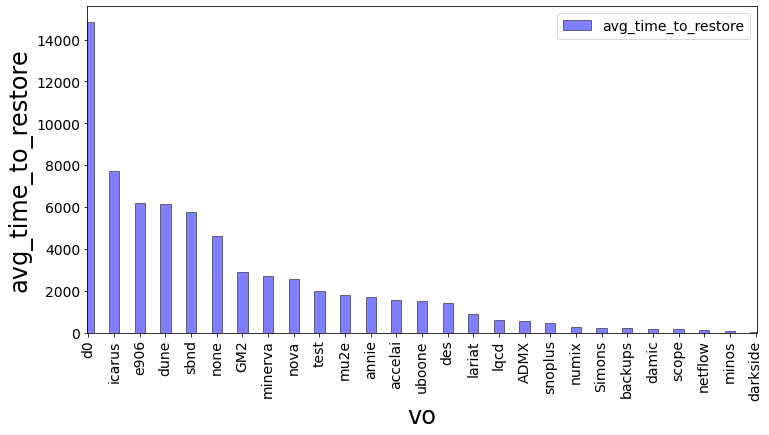

In [21]:
d1.plot.bar(x='vo', y='avg_time_to_restore' ,figsize=(12,6), color='blue',edgecolor = 'black', alpha=0.5 ,align='center', width=-0.4)
plt.xlabel("vo")
plt.ylabel("avg_time_to_restore" ,fontsize=24)
plt.xlabel("vo" ,fontsize=24)
plt.savefig('avg_time_to_restore_per_vo.png' ,fontsize=24)
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='vo'>

Text(0.5, 0, 'vo')

Text(0, 0.5, 'avg_time_to_restore')

/tmp/ipykernel_112851/2736179990.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('avg_time_to_restore_per_vo_6_months.png' ,fontsize=24)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'd0'),
  Text(1, 0, 'icarus'),
  Text(2, 0, 'e906'),
  Text(3, 0, 'dune'),
  Text(4, 0, 'sbnd'),
  Text(5, 0, 'none'),
  Text(6, 0, 'GM2'),
  Text(7, 0, 'minerva'),
  Text(8, 0, 'nova'),
  Text(9, 0, 'test'),
  Text(10, 0, 'mu2e'),
  Text(11, 0, 'annie'),
  Text(12, 0, 'accelai'),
  Text(13, 0, 'uboone'),
  Text(14, 0, 'des'),
  Text(15, 0, 'lariat'),
  Text(16, 0, 'lqcd'),
  Text(17, 0, 'ADMX'),
  Text(18, 0, 'snoplus'),
  Text(19, 0, 'numix'),
  Text(20, 0, 'Simons'),
  Text(21, 0, 'backups'),
  Text(22, 0, 'damic'),
  Text(23, 0, 'scope'),
  Text(24, 0, 'netflow'),
  Text(25, 0, 'minos'),
  Text(26, 0, 'darkside')])

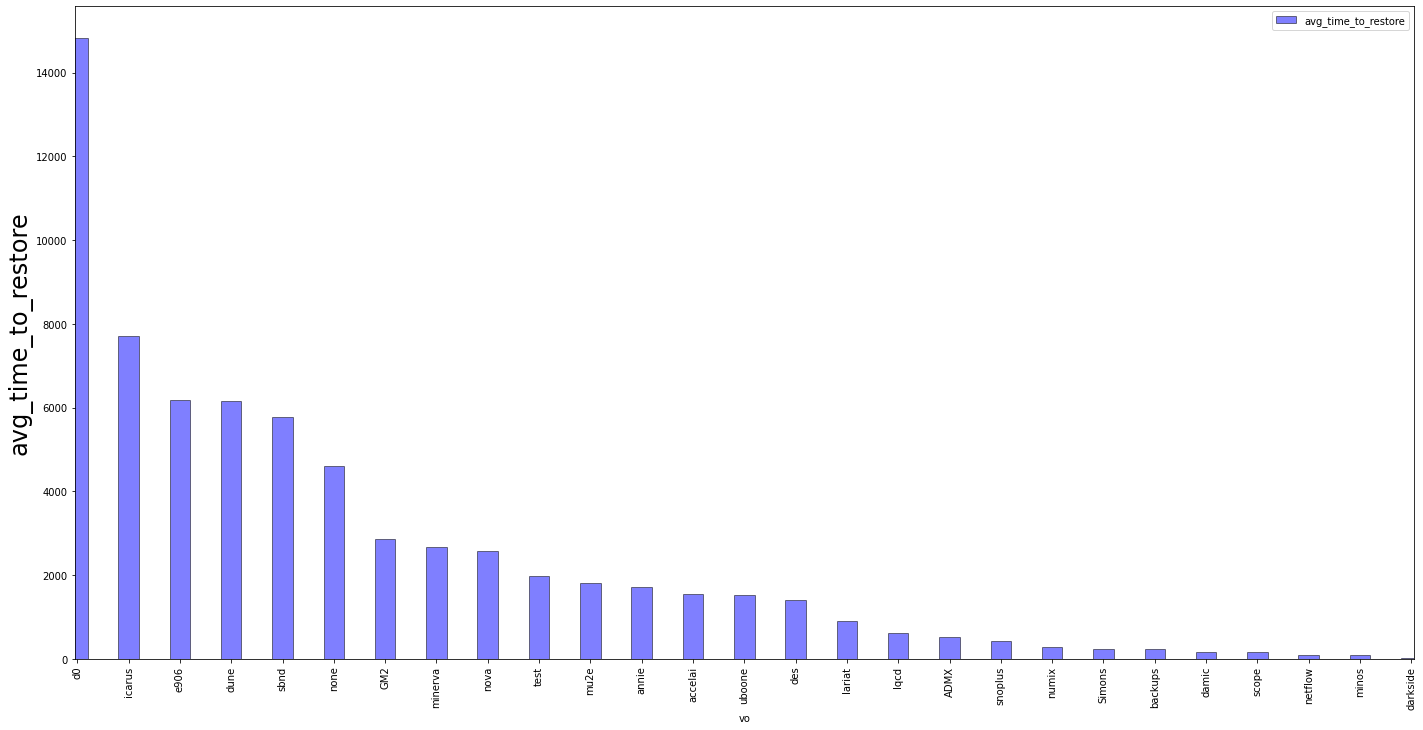

In [21]:
d1.plot.bar(x='vo', y='avg_time_to_restore' , color='blue',edgecolor = 'black', alpha=0.5 ,figsize=(24,12),align='center', width=-0.4)
plt.xlabel("vo")
plt.ylabel("avg_time_to_restore" ,fontsize=24)
plt.savefig('avg_time_to_restore_per_vo_6_months.png' ,fontsize=24)
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=90)
plt.show()

In [7]:
# d6.plot.bar(x='vo', y='time_to_restore' , color='blue',edgecolor = 'black', alpha=0.5 ,figsize=(24,12),align='center', width=-0.4)
# plt.xlabel("vo")
# plt.ylabel("time_to_restore" ,fontsize=24)
# #plt.savefig('time_to_restore_per_vo.png' ,fontsize=24)
# plt.rcParams.update({'font.size': 14})
# plt.xticks(rotation=90)
# plt.show()

In [22]:
df_vo_store = spark.sql("SELECT vo ,COUNT(vo) AS number_of_stores , AVG(connectiontime + queuedtime) as avg_time_to_store FROM storage WHERE action='store' and errorcode = 0 group by vo order by avg_time_to_store desc;  ")
df_vo_store.show()

+---------+----------------+--------------------+
|       vo|number_of_stores|   avg_time_to_store|
+---------+----------------+--------------------+
|    damic|               3|2.3509389366666666E8|
|  accelai|            5558| 1.507541329706729E8|
|     ADMX|          261797| 1.383389659250679E8|
|  netflow|           60280|1.2783908912352356E8|
|   Simons|         1089287|1.2267464799590558E8|
|      GM2|         3513864|1.1968959516386604E8|
|fermigrid|             716|1.1452141563268156E8|
|    e1039|             240|       1.102810774E8|
|      des|            2197| 1.048051572312244E8|
|    annie|           59615| 9.130090165392938E7|
|   uboone|        14188391| 6.714972888600884E7|
|     mu2e|          623474|  6.20553046695195E7|
|     lqcd|          274005| 5.653114456463568E7|
|   icarus|          573271| 5.443380440552897E7|
|     test|            7577| 4.758882694232546E7|
|     dune|         1209244| 3.991419395168717E7|
|  backups|               6|         3.9859227E7|


In [23]:
d2=df_vo_store.toPandas()
print(d2)

           vo  number_of_stores  avg_time_to_store
0       damic                 3       2.350939e+08
1     accelai              5558       1.507541e+08
2        ADMX            261797       1.383390e+08
3     netflow             60280       1.278391e+08
4      Simons           1089287       1.226746e+08
5         GM2           3513864       1.196896e+08
6   fermigrid               716       1.145214e+08
7       e1039               240       1.102811e+08
8         des              2197       1.048052e+08
9       annie             59615       9.130090e+07
10     uboone          14188391       6.714973e+07
11       mu2e            623474       6.205530e+07
12       lqcd            274005       5.653114e+07
13     icarus            573271       5.443380e+07
14       test              7577       4.758883e+07
15       dune           1209244       3.991419e+07
16    backups                 6       3.985923e+07
17       nova           6188980       3.838612e+07
18       e906              7699

In [24]:
d2['avg_time_to_store']=d2['avg_time_to_store'].div(1000)
print(d2)

           vo  number_of_stores  avg_time_to_store
0       damic                 3      235093.893667
1     accelai              5558      150754.132971
2        ADMX            261797      138338.965925
3     netflow             60280      127839.089124
4      Simons           1089287      122674.647996
5         GM2           3513864      119689.595164
6   fermigrid               716      114521.415633
7       e1039               240      110281.077400
8         des              2197      104805.157231
9       annie             59615       91300.901654
10     uboone          14188391       67149.728886
11       mu2e            623474       62055.304670
12       lqcd            274005       56531.144565
13     icarus            573271       54433.804406
14       test              7577       47588.826942
15       dune           1209244       39914.193952
16    backups                 6       39859.227000
17       nova           6188980       38386.122469
18       e906              7699

<AxesSubplot:xlabel='vo'>

Text(0.5, 0, 'vo')

Text(0, 0.5, 'avg_time_to_store')

/tmp/ipykernel_259211/2499800147.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('avg_time_to_store_per_vo.png' ,fontsize=24)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'test2'),
  Text(1, 0, 'uboone'),
  Text(2, 0, 'e1039'),
  Text(3, 0, 'des'),
  Text(4, 0, 'fermigrid'),
  Text(5, 0, 'accelai'),
  Text(6, 0, 'nova'),
  Text(7, 0, 'dune'),
  Text(8, 0, 'GM2'),
  Text(9, 0, 'annie'),
  Text(10, 0, 'test'),
  Text(11, 0, 'mu2e'),
  Text(12, 0, 'icarus'),
  Text(13, 0, 'Simons'),
  Text(14, 0, 'snoplus'),
  Text(15, 0, 'backups'),
  Text(16, 0, 'lqcd'),
  Text(17, 0, 'lariat'),
  Text(18, 0, 'next'),
  Text(19, 0, 'darkside')])

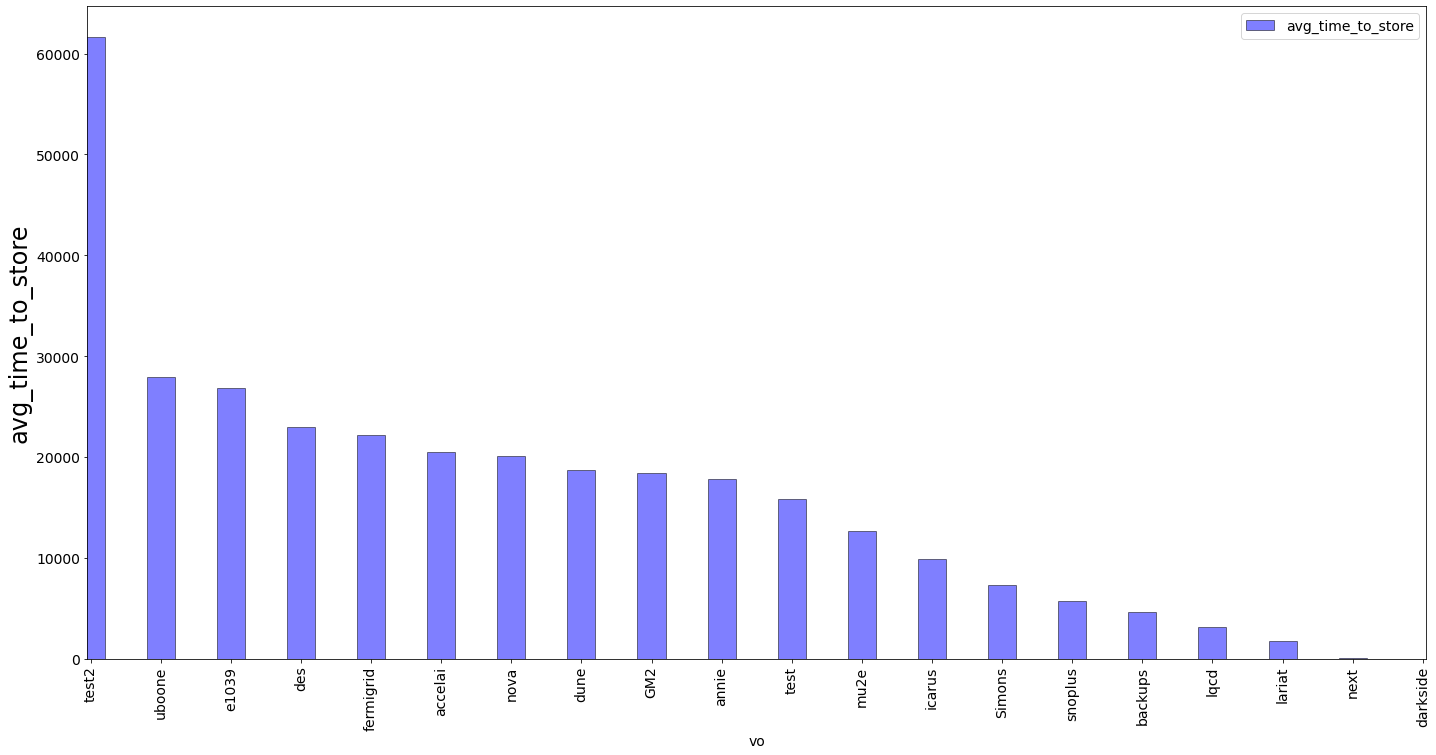

In [102]:
d2.plot.bar(x='vo', y='avg_time_to_store' , color='blue',edgecolor = 'black', alpha=0.5 ,figsize=(24,12),align='center', width=-0.4)
plt.xlabel("vo")
plt.ylabel("avg_time_to_store" ,fontsize=24)
plt.savefig('avg_time_to_store_per_vo.png' ,fontsize=24)
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='vo'>

Text(0.5, 0, 'vo')

Text(0, 0.5, 'avg_time_to_store')

/tmp/ipykernel_112851/1609889685.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('avg_time_to_store_per_vo_6_months.png' ,fontsize=24)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'damic'),
  Text(1, 0, 'accelai'),
  Text(2, 0, 'ADMX'),
  Text(3, 0, 'netflow'),
  Text(4, 0, 'Simons'),
  Text(5, 0, 'GM2'),
  Text(6, 0, 'fermigrid'),
  Text(7, 0, 'e1039'),
  Text(8, 0, 'des'),
  Text(9, 0, 'annie'),
  Text(10, 0, 'uboone'),
  Text(11, 0, 'mu2e'),
  Text(12, 0, 'lqcd'),
  Text(13, 0, 'icarus'),
  Text(14, 0, 'test'),
  Text(15, 0, 'dune'),
  Text(16, 0, 'backups'),
  Text(17, 0, 'nova'),
  Text(18, 0, 'e906'),
  Text(19, 0, 'test2'),
  Text(20, 0, 'lariat'),
  Text(21, 0, 'snoplus'),
  Text(22, 0, 'minerva'),
  Text(23, 0, 'sbnd'),
  Text(24, 0, 'minos'),
  Text(25, 0, 'next'),
  Text(26, 0, 'darkside')])

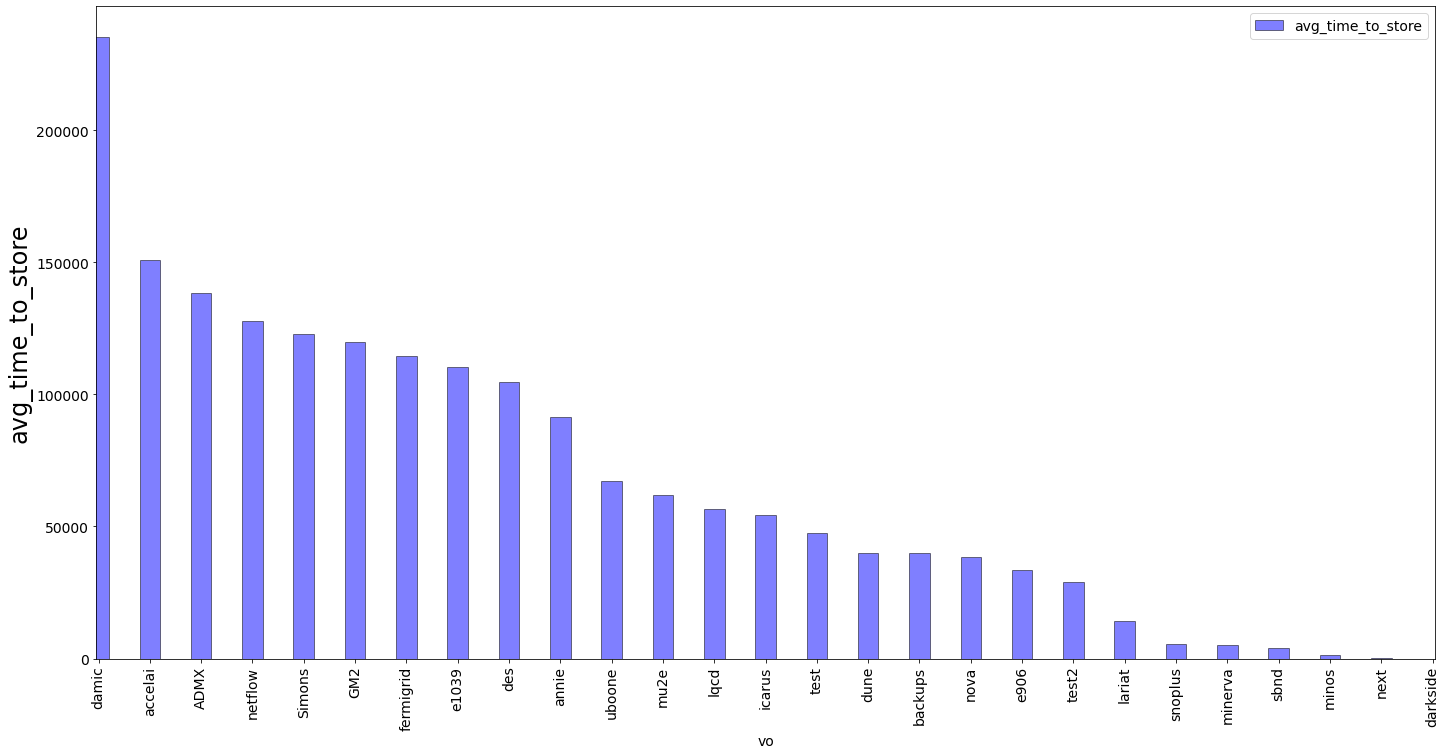

In [25]:
d2.plot.bar(x='vo', y='avg_time_to_store' , color='blue',edgecolor = 'black', alpha=0.5 ,figsize=(24,12),align='center', width=-0.4)
plt.xlabel("vo")
plt.ylabel("avg_time_to_store" ,fontsize=24)
plt.savefig('avg_time_to_store_per_vo_6_months.png' ,fontsize=24)
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=90)
plt.show()

In [103]:
#select avg(connectiontime+queuedtime)/1000. from storageinfo where errorcode = 0 and datestamp > '2022-06-01 00:00:00'  and storageclass like 'GM2%' and action = 'restore';

In [26]:
df_vo_mu2e = spark.sql("SELECT date, vo , (connectiontime+queuedtime)/1000 as connection_time FROM storage WHERE action='restore' and errorcode = 0 and vo='mu2e' group by date, vo, connection_time order by connection_time desc;  ")
df_vo_mu2e.show()

+-------------------+----+---------------+
|               date|  vo|connection_time|
+-------------------+----+---------------+
|2022-01-19 09:00:00|mu2e|     128179.023|
|2022-05-11 20:00:00|mu2e|     110889.563|
|2022-05-11 17:00:00|mu2e|     108027.066|
|2022-05-11 19:00:00|mu2e|      99632.224|
|2022-05-11 21:00:00|mu2e|      91081.944|
|2022-05-11 13:00:00|mu2e|       89247.43|
|2022-05-11 16:00:00|mu2e|      88518.428|
|2022-05-11 16:00:00|mu2e|      87427.006|
|2022-05-11 16:00:00|mu2e|      82225.849|
|2022-05-11 10:00:00|mu2e|      80513.648|
|2022-05-11 13:00:00|mu2e|      79884.999|
|2022-05-11 13:00:00|mu2e|      79807.048|
|2022-05-11 10:00:00|mu2e|      79793.599|
|2022-05-12 09:00:00|mu2e|      79404.433|
|2022-05-11 16:00:00|mu2e|      79347.044|
|2022-05-11 13:00:00|mu2e|      79135.397|
|2022-05-11 12:00:00|mu2e|      79122.035|
|2022-05-11 21:00:00|mu2e|      78742.416|
|2022-05-11 11:00:00|mu2e|      78511.648|
|2022-05-11 10:00:00|mu2e|       77016.36|
+----------

In [27]:
df_vo11 = spark.sql("SELECT date, vo , (connectiontime+queuedtime)/1000 as connection_time FROM billing WHERE action='restore' and errorcode = 0 and vo='mu2e' group by date, vo, connection_time   ")
df_vo11.show()

+-------------------+----+---------------+
|               date|  vo|connection_time|
+-------------------+----+---------------+
|2022-06-21 20:00:00|mu2e|      43269.264|
|2022-06-21 20:00:00|mu2e|      39238.272|
|2022-06-21 20:00:00|mu2e|      39987.569|
|2022-06-22 07:00:00|mu2e|          7.319|
|2022-06-22 08:00:00|mu2e|      48692.107|
|2022-06-22 08:00:00|mu2e|      42862.012|
|2022-06-22 08:00:00|mu2e|      42629.922|
|2022-06-22 10:00:00|mu2e|       33498.47|
|2022-06-22 10:00:00|mu2e|         16.481|
|2022-06-22 10:00:00|mu2e|          4.185|
|2022-06-22 10:00:00|mu2e|      34188.115|
|2022-06-22 12:00:00|mu2e|       8783.384|
|2022-06-22 12:00:00|mu2e|      17249.502|
|2022-06-22 15:00:00|mu2e|          6.212|
|2022-06-22 16:00:00|mu2e|        456.582|
|2022-06-22 17:00:00|mu2e|          8.413|
|2022-06-22 17:00:00|mu2e|       5079.083|
|2022-06-22 17:00:00|mu2e|       2444.394|
|2022-06-22 20:00:00|mu2e|          3.555|
|2022-06-22 20:00:00|mu2e|      26784.599|
+----------

In [105]:
df_vo_mu2e.count()

17699

In [28]:
d3=df_vo11.toPandas()
print(d3)

IOPub data rate exceeded.                                                       
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
d4=df_vo_mu2e.toPandas()
print(d4)

IOPub data rate exceeded.                                                       
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [146]:
print(d4['connection_time'].max())

68398.906


Text(0.5, 0, 'time_to_restore')

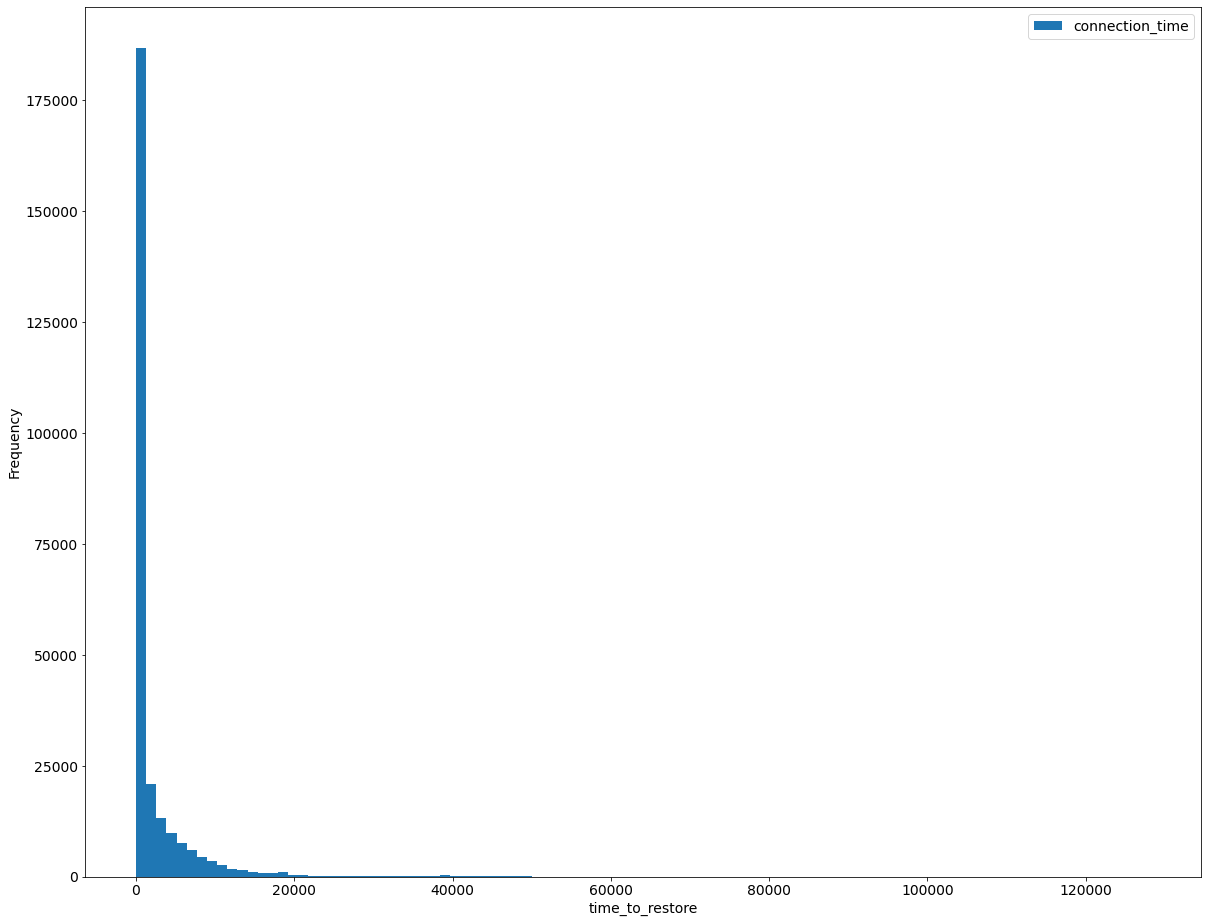

In [30]:
ax= d3.plot.hist(bins=100, figsize=(20, 16))
plt.xlabel("time_to_restore")
plt.savefig('hist_time_to_restore_for_mu2e.png')

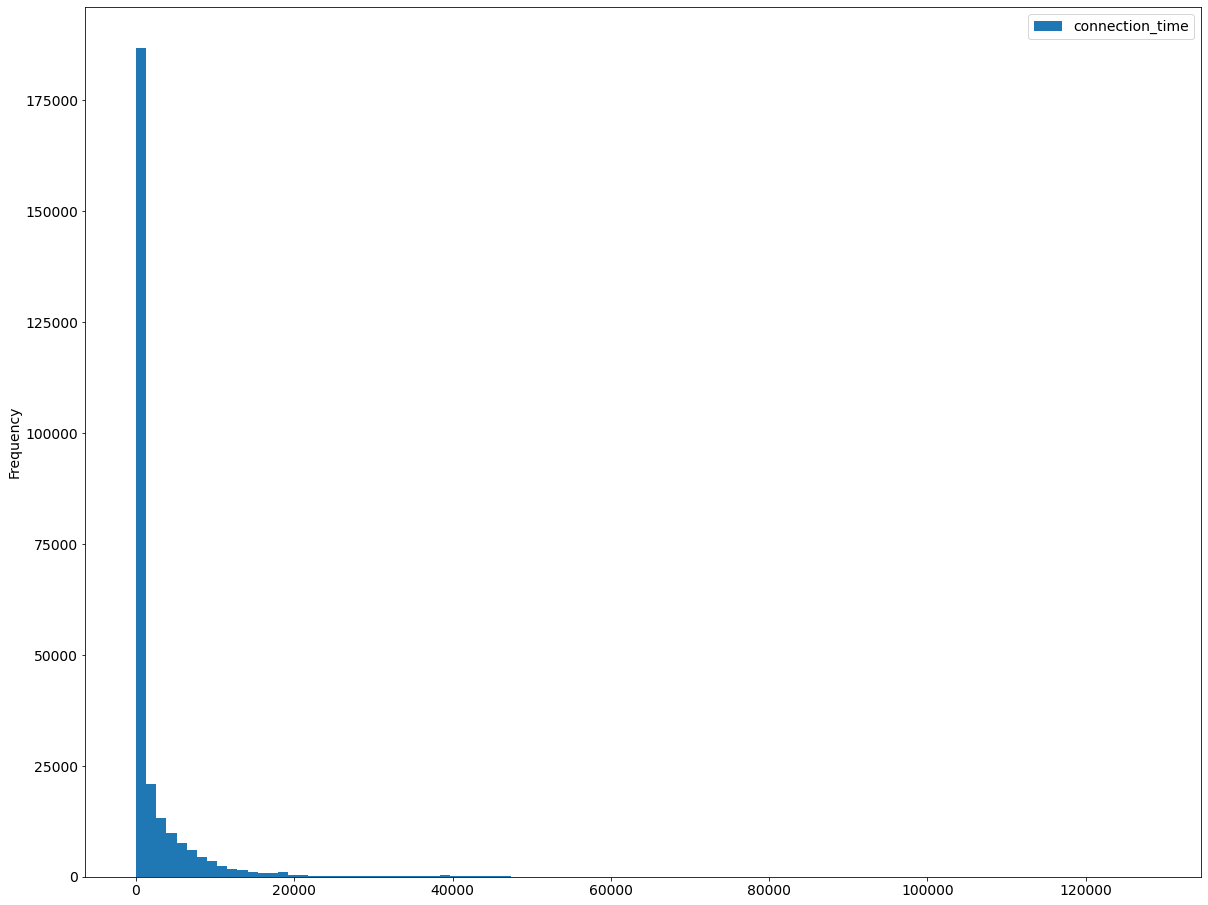

In [31]:
ax= d4.plot.hist(bins=100, figsize=(20, 16))
#plt.xlim(0, 68398.906)